In [224]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('engine_data.csv')

In [225]:
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [226]:
df['Engine Condition'].value_counts()

Engine Condition
1    12317
0     7218
Name: count, dtype: int64

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [228]:
corr_matrix = df.corr()
corr_matrix["Engine Condition"].sort_values(ascending=False)

Engine Condition    1.000000
Fuel pressure       0.116259
Lub oil pressure    0.060904
Coolant pressure   -0.024054
Coolant temp       -0.046326
lub oil temp       -0.093635
Engine rpm         -0.268201
Name: Engine Condition, dtype: float64

In [229]:
# Coolant Efficiency
df["Coolant efficiency"] = df["Coolant temp"] / (df["Engine rpm"] + 1)

# Lub oil Efficiency
df["Lub oil efficiency"] = df["lub oil temp"] / (df["Engine rpm"] + 1)

# Pressure coeff
df["Pressure coeff"] = df['Fuel pressure'] * df['Coolant pressure'] * df['Lub oil pressure']

# Temp coeff
df['Temp coeff'] = df['Coolant temp'] * df['Coolant temp']

# Coolant coeff
df['Coolant coeff'] = df['Coolant temp'] * df['Coolant pressure']

# Lub oil coeff
df['Lub oil coeff'] = df['lub oil temp'] * df['Lub oil pressure'] 

# Temp effect
df['Temp effect'] = df['Temp coeff'] / (df['Engine rpm'] + 1)

# Pressure effect
df['Pressure effect'] = df['Pressure coeff'] / (df['Engine rpm'] + 1)

# Thermal Pressure Index
df['Thermal pressure index'] = ((df['Coolant temp'] + df['lub oil temp']) 
                                * (df['Coolant pressure'] + df['Lub oil pressure']))


In [230]:
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition,Coolant efficiency,Lub oil efficiency,Pressure coeff,Temp coeff,Coolant coeff,Lub oil coeff,Temp effect,Pressure effect,Thermal pressure index
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1,0.116451,0.120034,93.467631,6663.813873,259.507153,209.821196,9.506154,0.133335,940.378380
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0,0.094009,0.088530,117.399027,6797.297488,203.187793,228.389032,7.750624,0.133864,865.446028
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1,0.152871,0.149237,20.657644,6343.449741,84.770725,230.282429,12.175527,0.039650,633.699053
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1,0.151423,0.156392,269.645956,5151.597324,267.536725,274.861445,10.868349,0.568873,1084.842552
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0,0.140323,0.126447,183.235961,7569.039216,178.546339,444.739735,12.208128,0.295542,1277.721604


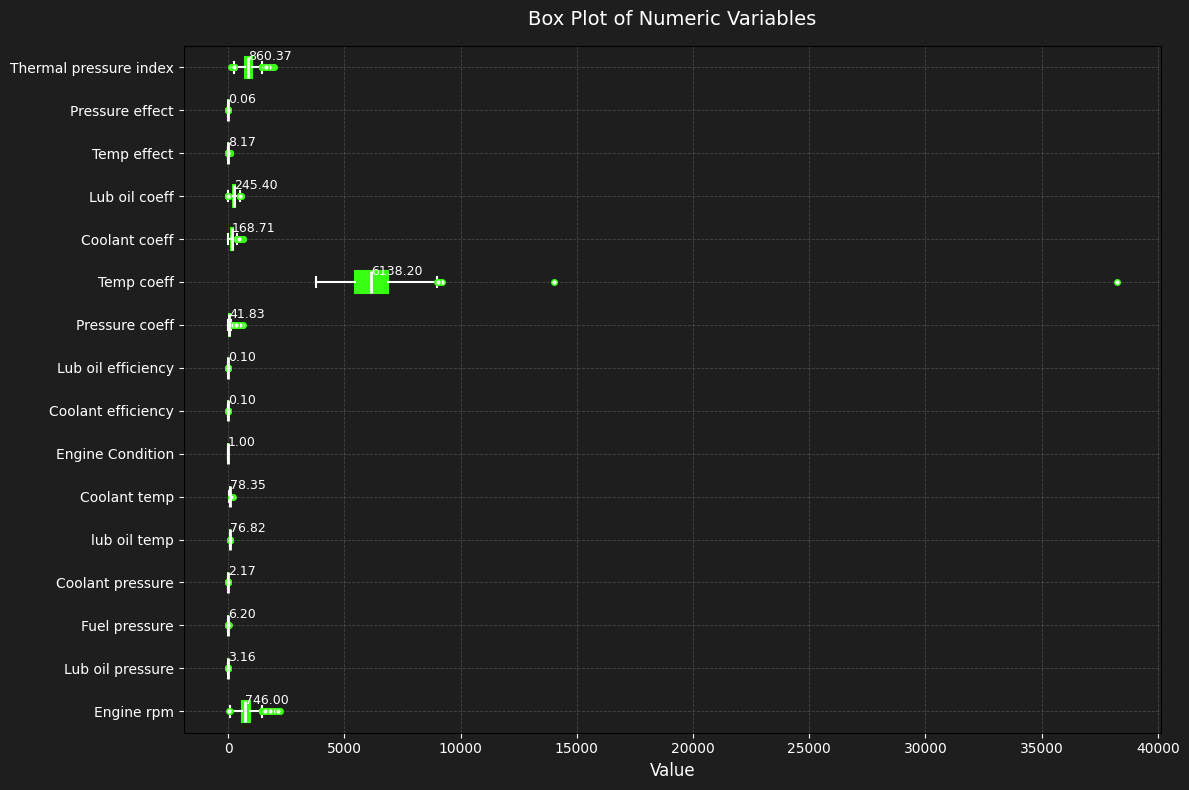

In [174]:
import matplotlib.pyplot as plt

# Select numeric variables
numeric_variables = df.select_dtypes(include='number')

fig, ax = plt.subplots(figsize=(12, 8))

# Set background colors
fig.patch.set_facecolor('#1e1e1e')  # dark gray background
ax.set_facecolor('#1e1e1e')

# Create box plots
box_plot = ax.boxplot(
    numeric_variables.values,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor='#39ff14', color='#39ff14', linewidth=1.5),
    whiskerprops=dict(color='white', linewidth=1.5),
    capprops=dict(color='white', linewidth=1.5),
    medianprops=dict(color='white', linewidth=2),
    flierprops=dict(markerfacecolor='white', marker='o', markersize=4, linestyle='none', markeredgecolor='#39ff14')
)

# Set y-axis labels with proper spacing and color
ax.set_yticks(range(1, len(numeric_variables.columns) + 1))
ax.set_yticklabels(numeric_variables.columns, color='white', fontsize=11)

# Set axis labels and title
ax.set_xlabel('Value', color='white', fontsize=12)
ax.set_title('Box Plot of Numeric Variables', color='white', fontsize=14, pad=15)

# Grid and ticks
ax.tick_params(colors='white', labelsize=10)
ax.grid(True, color='gray', linestyle='--', linewidth=0.6, alpha=0.4)

# Annotate median values
for i, line in enumerate(box_plot['medians']):
    x, y = line.get_xydata()[1]
    ax.text(x, y, f'{x:.2f}', color='white', va='center', ha='left', fontsize=9)

# Adjust layout
plt.tight_layout()
plt.show()


<Axes: xlabel='None', ylabel='Thermal pressure index'>

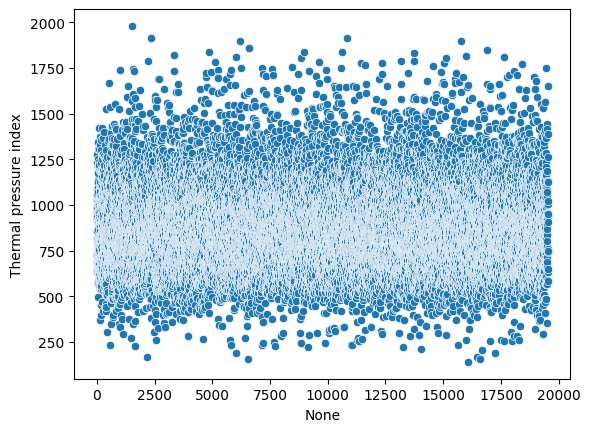

In [175]:
sns.scatterplot(data=df, x=df.index, y='Thermal pressure index')

In [176]:
df = df[(df['Thermal pressure index'] <= 1300) & (df['Thermal pressure index'] >= 500)]

<Axes: xlabel='None', ylabel='Pressure effect'>

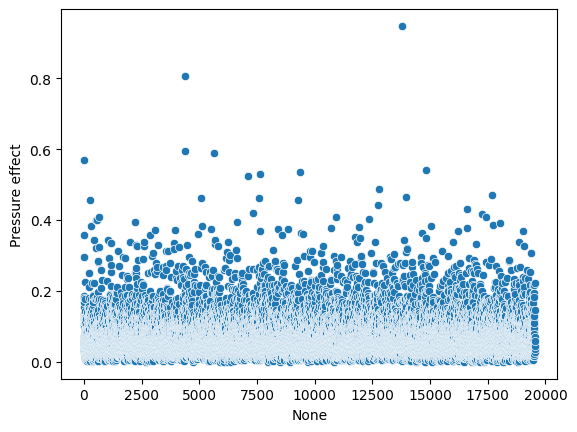

In [177]:
sns.scatterplot(data=df, x=df.index, y='Pressure effect')

In [178]:
df = df[(df['Pressure effect'] <= 0.2)]

<Axes: xlabel='None', ylabel='Temp effect'>

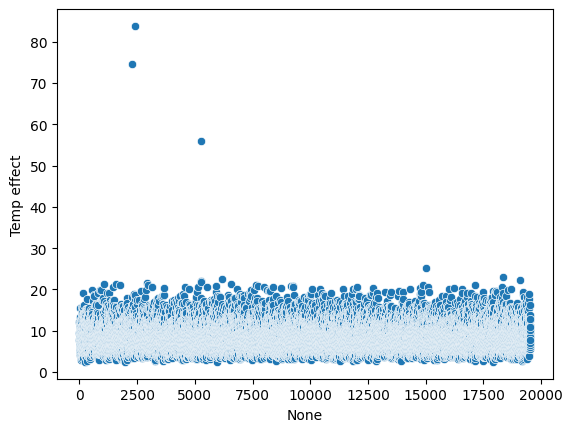

In [179]:
sns.scatterplot(data=df, x=df.index, y='Temp effect')

In [180]:
df = df[(df['Temp effect'] <= 20)]

<Axes: xlabel='None', ylabel='Lub oil coeff'>

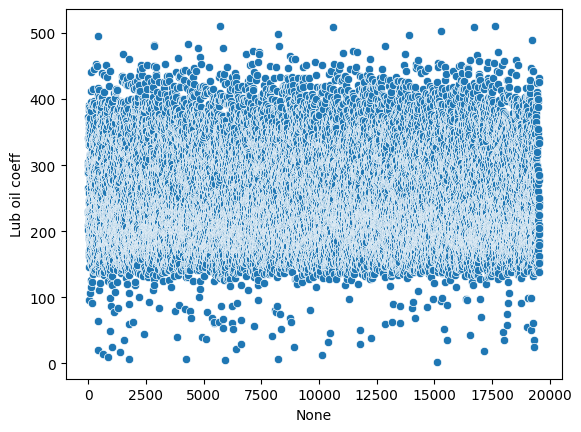

In [181]:
sns.scatterplot(data=df, x=df.index, y='Lub oil coeff')

In [182]:
df = df[(df['Lub oil coeff'] <= 420) & (df['Lub oil coeff'] >= 130)]

<Axes: xlabel='None', ylabel='Coolant coeff'>

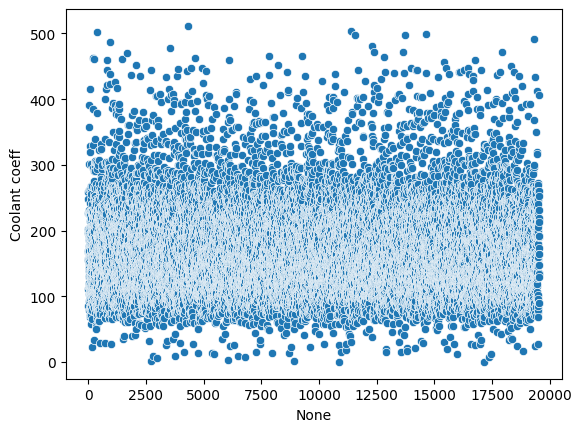

In [183]:
sns.scatterplot(data=df, x=df.index, y='Coolant coeff')

In [184]:
df = df[(df['Coolant coeff'] <= 310) & (df['Coolant coeff'] >= 65)]

<Axes: xlabel='None', ylabel='Engine rpm'>

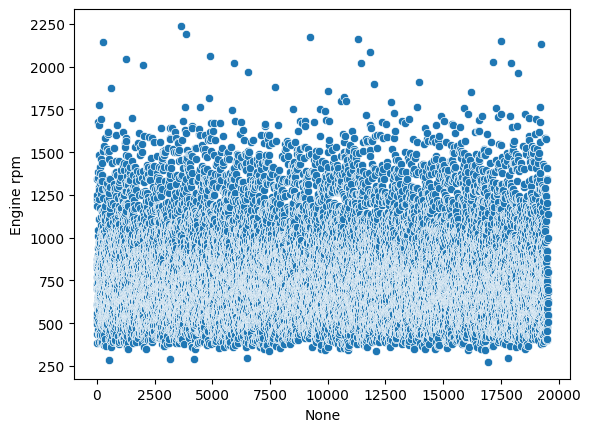

In [185]:
sns.scatterplot(data=df, x=df.index, y='Engine rpm')

In [186]:
df = df[(df['Engine rpm'] <= 1400 ) & (df['Engine rpm'] >= 400)]

In [187]:
corr_matrix = df.corr()
corr_matrix["Engine Condition"].sort_values(ascending=False)

Engine Condition          1.000000
Lub oil efficiency        0.242480
Coolant efficiency        0.235762
Temp effect               0.204600
Pressure effect           0.186990
Fuel pressure             0.100747
Pressure coeff            0.077781
Lub oil pressure          0.046305
Lub oil coeff             0.032450
Thermal pressure index    0.010944
Coolant pressure         -0.014929
Coolant coeff            -0.025378
Temp coeff               -0.041736
Coolant temp             -0.043431
lub oil temp             -0.091699
Engine rpm               -0.244085
Name: Engine Condition, dtype: float64

In [188]:
df['Engine Condition'].value_counts()

Engine Condition
1    9898
0    5693
Name: count, dtype: int64

In [189]:
import sklearn
from sklearn.model_selection import train_test_split

X = df.drop("Engine Condition", axis=1)
y = df["Engine Condition"]

In [211]:
X.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Coolant efficiency,Lub oil efficiency,Pressure coeff,Temp coeff,Coolant coeff,Lub oil coeff,Temp effect,Pressure effect,Thermal pressure index
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,0.116451,0.120034,93.467631,6663.813873,259.507153,209.821196,9.506154,0.133335,940.378380
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0.094009,0.088530,117.399027,6797.297488,203.187793,228.389032,7.750624,0.133864,865.446028
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,0.152871,0.149237,20.657644,6343.449741,84.770725,230.282429,12.175527,0.039650,633.699053
5,1221,3.989226,6.679231,2.214250,76.401152,75.669818,0.061923,0.062521,58.998611,5725.921358,167.551921,304.781457,4.685697,0.048280,943.368656
6,716,3.568896,5.312266,2.461067,83.646589,79.792411,0.111286,0.116662,46.659186,6366.828823,196.374475,298.525953,8.879817,0.065076,985.531087


In [190]:
from imblearn.over_sampling import SMOTE

# First, apply SMOTE to balance the classes
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
from collections import Counter
print(Counter(y_resampled))


Counter({1: 9898, 0: 9898})


In [191]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assume X_resampled, y_resampled from SMOTE

# 1. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# 2. Apply PCA (e.g., keep 95% of variance)
pca = PCA(n_components=0.95, random_state=21)
X_pca = pca.fit_transform(X_scaled)

print(f"Original feature count: {X.shape[1]}")
print(f"Reduced feature count after PCA: {X_pca.shape[1]}")

# Now you can do train-test split on X_pca and y_resampled
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_pca, y_resampled, test_size=0.3, random_state=21, stratify=y_resampled)

# Split remaining 30% into 15% val and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=21, stratify=y_temp)

print(f"Train size: {X_train.shape[0]}, Validation size: {X_val.shape[0]}, Test size: {X_test.shape[0]}")


Original feature count: 15
Reduced feature count after PCA: 6
Train size: 13857, Validation size: 2969, Test size: 2970


In [192]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Define degrees and regularization strengths to try
degrees = [1, 2, 3]  # polynomial degrees to test
C_values = [0.01, 0.1, 1, 10]  # inverse of regularization strength (L2)

results = []

for degree in degrees:
    # Create polynomial features transformer
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    # Transform the datasets
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)
    
    for C in C_values:
        print(f"Training model with degree={degree}, C={C}")
        
        # Initialize logistic regression with L2 regularization
        model = LogisticRegression(penalty='l2', C=C, max_iter=5000, solver='lbfgs', random_state=21)
        
        # Train model
        model.fit(X_train_poly, y_train)
        
        # Predict on validation set
        y_val_pred = model.predict(X_val_poly)
        
        # Evaluate
        report = classification_report(y_val, y_val_pred, output_dict=True)
        accuracy = accuracy_score(y_val, y_val_pred)
        
        # Save results
        results.append({
            'degree': degree,
            'C': C,
            'val_accuracy': accuracy,
            'val_precision_0': report['0']['precision'],
            'val_recall_0': report['0']['recall'],
            'val_f1_0': report['0']['f1-score'],
            'val_precision_1': report['1']['precision'],
            'val_recall_1': report['1']['recall'],
            'val_f1_1': report['1']['f1-score']
        })

# Convert to DataFrame for easier comparison
results_df = pd.DataFrame(results)

print("\nSummary of results on validation set:")
print(results_df)

# Optional: find best model by validation accuracy
best_idx = results_df['val_accuracy'].idxmax()
best_params = results_df.loc[best_idx]
print("\nBest params:")
print(best_params)

best_degree = int(best_params['degree'])

# Refit polynomial features on combined train + val
poly = PolynomialFeatures(degree=best_degree, include_bias=False)

# Combine train and val sets
X_train_val = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_val)], ignore_index=True)
y_train_val = pd.concat([pd.Series(y_train), pd.Series(y_val)], ignore_index=True)

# Fit polynomial on combined data
X_train_val_poly = poly.fit_transform(X_train_val)
X_test_poly = poly.transform(X_test)

# Train model on combined train+val
best_model = LogisticRegression(penalty='l2', C=best_C, max_iter=5000, solver='lbfgs', random_state=21)
best_model.fit(X_train_val_poly, y_train_val)

# Predict on test set
y_test_pred = best_model.predict(X_test_poly)

print("\nTest set performance of best model:")
print(classification_report(y_test, y_test_pred))
print(f"Test accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

Training model with degree=1, C=0.01
Training model with degree=1, C=0.1
Training model with degree=1, C=1
Training model with degree=1, C=10
Training model with degree=2, C=0.01
Training model with degree=2, C=0.1
Training model with degree=2, C=1
Training model with degree=2, C=10
Training model with degree=3, C=0.01
Training model with degree=3, C=0.1
Training model with degree=3, C=1
Training model with degree=3, C=10

Summary of results on validation set:
    degree      C  val_accuracy  val_precision_0  val_recall_0  val_f1_0  \
0        1   0.01      0.632536         0.623352      0.669137  0.645434   
1        1   0.10      0.632536         0.623352      0.669137  0.645434   
2        1   1.00      0.632873         0.623588      0.669811  0.645874   
3        1  10.00      0.632873         0.623588      0.669811  0.645874   
4        2   0.01      0.624789         0.609727      0.692722  0.648580   
5        2   0.10      0.626474         0.611408      0.693396  0.649826   
6  

### **Baseline**

Test set performance of best model:
              precision    recall  f1-score   support

           0       0.62      0.67      0.65      1485
           1       0.65      0.59      0.62      1485

    accuracy                           0.63      2970
   macro avg       0.64      0.63      0.63      2970
weighted avg       0.64      0.63      0.63      2970

Test accuracy: 0.6343

In [193]:
import xgboost
from xgboost import XGBClassifier

model = XGBClassifier()  
model.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))  
y_pred = model.predict(X_test)

Accuracy: 0.6525252525252525
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.69      0.67      1485
           1       0.67      0.61      0.64      1485

    accuracy                           0.65      2970
   macro avg       0.65      0.65      0.65      2970
weighted avg       0.65      0.65      0.65      2970

Confusion Matrix:
 [[1032  453]
 [ 579  906]]
ROC AUC: 0.7019356301511184


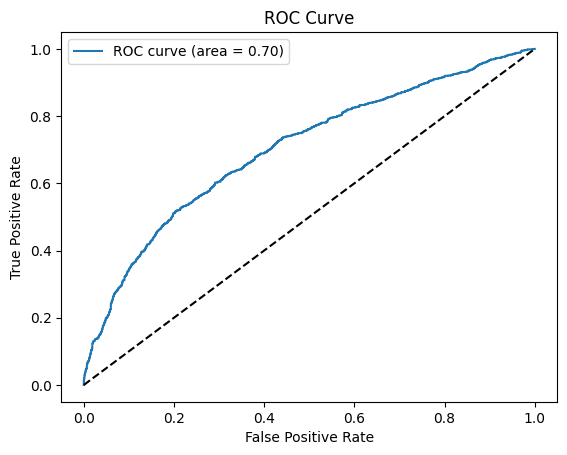

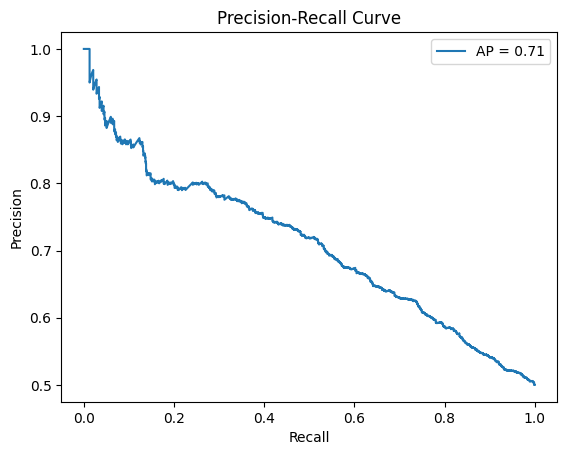

In [194]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    average_precision_score,
)
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report (precision, recall, f1 per class)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# For ROC AUC, need predicted probabilities for positive class
y_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)
plt.figure()
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [195]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 7],           # tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # step size shrinkage
    'n_estimators': [100, 200],       # number of trees
    'subsample': [0.7, 1.0],          # fraction of samples for training each tree
    'colsample_bytree': [0.7, 1.0],   # fraction of features used per tree
    'reg_lambda': [1, 10]              # L2 regularization
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',   # you can change this depending on your goal
    cv=3,               # 3-fold cross validation
    verbose=2,
    n_jobs=-1
)

# Run grid search
grid_search.fit(X_train_val, y_train_val)

# Best parameters & score
print("Best params:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)

# Use best estimator to predict on test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test ROC AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'reg_lambda': 1, 'subsample': 0.7}
Best ROC AUC: 0.7006043274027073
Test Accuracy: 0.6575757575757576
Test ROC AUC: 0.7135308188506841
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.72      0.68      1485
           1       0.68      0.59      0.63      1485

    accuracy                           0.66      2970
   macro avg       0.66      0.66      0.66      2970
weighted avg       0.66      0.66      0.66      2970

Confusion Matrix:
 [[1070  415]
 [ 602  883]]


In [ ]:
# import optuna
# from xgboost import XGBClassifier
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import train_test_split

# # Define objective function to minimize (or maximize)
# def objective(trial):
#     param = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 500),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 10.0, log=True),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'random_state': 42,
#         'use_label_encoder': False,
#         'eval_metric': 'logloss'
#     }

#     model = XGBClassifier(**param)
#     model.fit(X_train, y_train)

#     y_pred_proba = model.predict_proba(X_val)[:, 1]
#     roc_auc = roc_auc_score(y_val, y_pred_proba)
#     return roc_auc  # we want to maximize ROC AUC

# # Create study and optimize
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=200)  # you can increase n_trials for better results

# print("Best trial:")
# trial = study.best_trial
# print(f"  ROC AUC: {trial.value}")
# print("  Params: ")
# for key, value in trial.params.items():
#     print(f"    {key}: {value}")

# # Train best model on full train+val set
# best_params = trial.params
# best_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
# best_model.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))

# # Evaluate on test set
# y_test_pred = best_model.predict(X_test)
# y_test_proba = best_model.predict_proba(X_test)[:, 1]

# from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
# print("Classification Report:")
# print(classification_report(y_test, y_test_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_test_pred))
# print(f"Test ROC AUC: {roc_auc_score(y_test, y_test_proba)}")


[I 2025-07-27 05:42:52,120] A new study created in memory with name: no-name-32c7dbf8-4473-46a6-b865-264bd0665949
[I 2025-07-27 05:42:52,228] Trial 0 finished with value: 0.6930236779293382 and parameters: {'n_estimators': 208, 'max_depth': 3, 'learning_rate': 0.033354974629464774, 'subsample': 0.9453846028376407, 'colsample_bytree': 0.503049948132583, 'reg_lambda': 1.0748352881867336, 'min_child_weight': 2}. Best is trial 0 with value: 0.6930236779293382.
[I 2025-07-27 05:42:52,530] Trial 1 finished with value: 0.6990330075235734 and parameters: {'n_estimators': 424, 'max_depth': 4, 'learning_rate': 0.020845551502370514, 'subsample': 0.6632990286312952, 'colsample_bytree': 0.9908346900889131, 'reg_lambda': 6.04900285504745, 'min_child_weight': 4}. Best is trial 1 with value: 0.6990330075235734.
[I 2025-07-27 05:42:53,002] Trial 2 finished with value: 0.6997617686296932 and parameters: {'n_estimators': 448, 'max_depth': 7, 'learning_rate': 0.18362925138133612, 'subsample': 0.7634617501

Best trial:
  ROC AUC: 0.734042809042809
  Params: 
    n_estimators: 480
    max_depth: 10
    learning_rate: 0.05188318003694354
    subsample: 0.7699137571140511
    colsample_bytree: 0.9731437592695202
    reg_lambda: 0.37918961519133754
    min_child_weight: 1
Test Accuracy: 0.6777777777777778
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1485
           1       0.70      0.63      0.66      1485

    accuracy                           0.68      2970
   macro avg       0.68      0.68      0.68      2970
weighted avg       0.68      0.68      0.68      2970

Confusion Matrix:
[[1074  411]
 [ 546  939]]
Test ROC AUC: 0.7347522361663774


In [ ]:
# import optuna
# from xgboost import XGBClassifier
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import train_test_split

# # Define objective function to minimize (or maximize)
# def objective(trial):
#     param = {
#         'n_estimators': trial.suggest_int('n_estimators', 400, 600),
#         'max_depth': trial.suggest_int('max_depth', 10, 15),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 10.0, log=True),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'random_state': 42,
#         'use_label_encoder': False,
#         'eval_metric': 'logloss'
#     }

#     model = XGBClassifier(**param)
#     model.fit(X_train, y_train)

#     y_pred_proba = model.predict_proba(X_val)[:, 1]
#     roc_auc = roc_auc_score(y_val, y_pred_proba)
#     return roc_auc  # we want to maximize ROC AUC

# # Create study and optimize
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=200)  # you can increase n_trials for better results

# print("Best trial:")
# trial = study.best_trial
# print(f"  ROC AUC: {trial.value}")
# print("  Params: ")
# for key, value in trial.params.items():
#     print(f"    {key}: {value}")

# # Train best model on full train+val set
# best_params = trial.params
# best_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
# best_model.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))

# # Evaluate on test set
# y_test_pred = best_model.predict(X_test)
# y_test_proba = best_model.predict_proba(X_test)[:, 1]

# from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
# print("Classification Report:")
# print(classification_report(y_test, y_test_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_test_pred))
# print(f"Test ROC AUC: {roc_auc_score(y_test, y_test_proba)}")


[I 2025-07-27 05:58:26,084] A new study created in memory with name: no-name-0ae06d01-c011-445a-8214-dd3eb6fa36bd
[I 2025-07-27 05:58:27,714] Trial 0 finished with value: 0.7146977411128355 and parameters: {'n_estimators': 434, 'max_depth': 15, 'learning_rate': 0.1487533033846955, 'subsample': 0.606192699747129, 'colsample_bytree': 0.6897245342788072, 'reg_lambda': 0.29869150374862813, 'min_child_weight': 2}. Best is trial 0 with value: 0.7146977411128355.
[I 2025-07-27 05:58:28,537] Trial 1 finished with value: 0.7051389909880476 and parameters: {'n_estimators': 403, 'max_depth': 15, 'learning_rate': 0.18256947263754367, 'subsample': 0.9846982695379638, 'colsample_bytree': 0.7720899924248291, 'reg_lambda': 0.6159326824319384, 'min_child_weight': 7}. Best is trial 0 with value: 0.7146977411128355.
[I 2025-07-27 05:58:29,399] Trial 2 finished with value: 0.7165986005608647 and parameters: {'n_estimators': 571, 'max_depth': 10, 'learning_rate': 0.08695754263067355, 'subsample': 0.9141787

Best trial:
  ROC AUC: 0.7449345204062185
  Params: 
    n_estimators: 470
    max_depth: 15
    learning_rate: 0.010403793651140315
    subsample: 0.9148968461511873
    colsample_bytree: 0.9625153982741361
    reg_lambda: 0.2079118698764317
    min_child_weight: 1
Test Accuracy: 0.692929292929293
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1485
           1       0.71      0.65      0.68      1485

    accuracy                           0.69      2970
   macro avg       0.69      0.69      0.69      2970
weighted avg       0.69      0.69      0.69      2970

Confusion Matrix:
[[1100  385]
 [ 527  958]]
Test ROC AUC: 0.7569767257309344


In [ ]:
# import optuna
# from xgboost import XGBClassifier
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import train_test_split

# # Define objective function to minimize (or maximize)
# def objective(trial):
#     param = {
#         'n_estimators': trial.suggest_int('n_estimators', 400, 600),
#         'max_depth': trial.suggest_int('max_depth', 15, 25),
#         'learning_rate': 0.01,
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 10.0, log=True),
#         'min_child_weight': 1,
#         'random_state': 42,
#         'use_label_encoder': False,
#         'eval_metric': 'logloss'
#     }

#     model = XGBClassifier(**param)
#     model.fit(X_train, y_train)

#     y_pred_proba = model.predict_proba(X_val)[:, 1]
#     roc_auc = roc_auc_score(y_val, y_pred_proba)
#     return roc_auc  # we want to maximize ROC AUC

# # Create study and optimize
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=200)  # you can increase n_trials for better results

# print("Best trial:")
# trial = study.best_trial
# print(f"  ROC AUC: {trial.value}")
# print("  Params: ")
# for key, value in trial.params.items():
#     print(f"    {key}: {value}")

# # Train best model on full train+val set
# best_params = trial.params
# best_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
# best_model.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))

# # Evaluate on test set
# y_test_pred = best_model.predict(X_test)
# y_test_proba = best_model.predict_proba(X_test)[:, 1]

# from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
# print("Classification Report:")
# print(classification_report(y_test, y_test_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_test_pred))
# print(f"Test ROC AUC: {roc_auc_score(y_test, y_test_proba)}")


[I 2025-07-27 06:15:52,406] A new study created in memory with name: no-name-0688b026-5ab2-41f3-bbe7-fc5aa6c3516f
[I 2025-07-27 06:15:56,809] Trial 0 finished with value: 0.7376500857632933 and parameters: {'n_estimators': 434, 'max_depth': 22, 'subsample': 0.6044323924139826, 'colsample_bytree': 0.7201984207710372, 'reg_lambda': 0.9462191595005931}. Best is trial 0 with value: 0.7376500857632933.
[I 2025-07-27 06:16:00,922] Trial 1 finished with value: 0.733853812155699 and parameters: {'n_estimators': 470, 'max_depth': 21, 'subsample': 0.5072870071422615, 'colsample_bytree': 0.7186133092507079, 'reg_lambda': 0.7665335988520853}. Best is trial 0 with value: 0.7376500857632933.
[I 2025-07-27 06:16:05,472] Trial 2 finished with value: 0.739547315019013 and parameters: {'n_estimators': 505, 'max_depth': 17, 'subsample': 0.7152514033971948, 'colsample_bytree': 0.8410076339242814, 'reg_lambda': 1.7059795434553995}. Best is trial 2 with value: 0.739547315019013.
[I 2025-07-27 06:16:09,926] 

Best trial:
  ROC AUC: 0.7486951727517765
  Params: 
    n_estimators: 579
    max_depth: 24
    subsample: 0.7800673766516119
    colsample_bytree: 0.8906152982505768
    reg_lambda: 0.19805435701523347
Test Accuracy: 0.6686868686868687
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68      1485
           1       0.68      0.63      0.65      1485

    accuracy                           0.67      2970
   macro avg       0.67      0.67      0.67      2970
weighted avg       0.67      0.67      0.67      2970

Confusion Matrix:
[[1052  433]
 [ 551  934]]
Test ROC AUC: 0.7274550215964357


In [201]:
X_ftrain, X_ftest, y_ftrain, y_ftest = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=21, stratify=y_resampled)

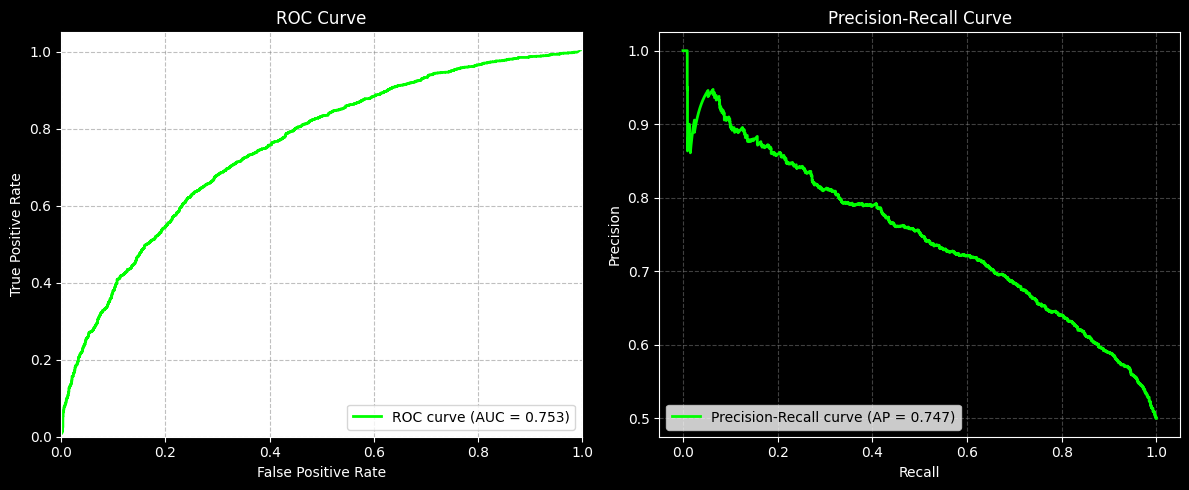

In [215]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Your params
params = {
    'n_estimators': 470,
    'max_depth': 15,
    'learning_rate': 0.010403793651140315,
    'subsample': 0.9148968461511873,
    'colsample_bytree': 0.9625153982741361,
    'reg_lambda': 0.2079118698764317,
    'min_child_weight': 1,
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'random_state': 42
}

# Train/test split
X_ftrain, X_ftest, y_ftrain, y_ftest = train_test_split(
    X_pca, y_resampled, test_size=0.2, random_state=21, stratify=y_resampled
)

# Train model
modelf = XGBClassifier(**params)
modelf.fit(X_ftrain, y_ftrain)

# Predict probabilities
y_proba = modelf.predict_proba(X_ftest)[:, 1]

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_ftest, y_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_ftest, y_proba)
avg_precision = average_precision_score(y_ftest, y_proba)

# Plot ROC curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='lime', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='white', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color='white')
plt.ylabel('True Positive Rate', color='white')
plt.title('ROC Curve', color='white')
plt.legend(loc='lower right')
plt.grid(True, color='gray', linestyle='--', alpha=0.5)

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='lime', lw=2, label=f'Precision-Recall curve (AP = {avg_precision:.3f})')
plt.xlabel('Recall', color='white')
plt.ylabel('Precision', color='white')
plt.title('Precision-Recall Curve', color='white')
plt.legend(loc='lower left')
plt.grid(True, color='gray', linestyle='--', alpha=0.5)

# Dark background styling
plt.gcf().set_facecolor('black')
plt.gca().patch.set_facecolor('black')

# Make all text white for both plots
for ax in plt.gcf().axes:
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    for spine in ax.spines.values():
        spine.set_color('white')

plt.tight_layout()
plt.show()


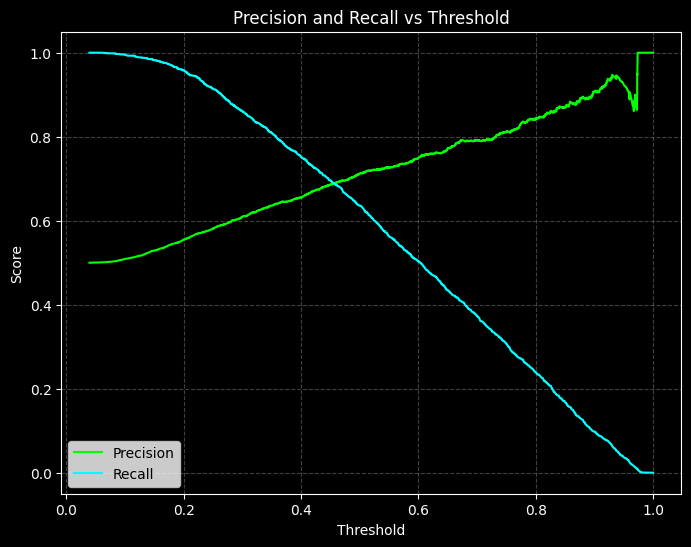

In [203]:
# Assuming you already have y_ftest and y_proba from your model

precision, recall, thresholds = precision_recall_curve(y_ftest, y_proba)

# precision_recall_curve returns thresholds length = len(precision) - 1, so align arrays
thresholds = list(thresholds) + [1.0]  # append 1 to match length for plotting

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision, label='Precision', color='lime')
plt.plot(thresholds, recall, label='Recall', color='cyan')
plt.xlabel('Threshold', color='white')
plt.ylabel('Score', color='white')
plt.title('Precision and Recall vs Threshold', color='white')
plt.legend()

plt.grid(True, color='gray', linestyle='--', alpha=0.5)
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
for spine in plt.gca().spines.values():
    spine.set_color('white')

plt.show()

In [210]:
threshold = 0.46
y_pred_custom = (y_proba >= threshold).astype(int)
print(classification_report(y_ftest, y_pred_custom))
print(confusion_matrix(y_ftest, y_pred_custom))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1980
           1       0.69      0.69      0.69      1980

    accuracy                           0.69      3960
   macro avg       0.69      0.69      0.69      3960
weighted avg       0.69      0.69      0.69      3960

[[1374  606]
 [ 622 1358]]


In [ ]:
import joblib

# # After training
# joblib.dump(scaler, 'scaler.pkl')
# joblib.dump(pca, 'pca.pkl')
# joblib.dump(modelf, 'model.pkl')

['model.pkl']